In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Data Preprocessing

In [29]:
# Load the training dataset
df_train = pd.read_csv('./data/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [30]:
# Extract features and labels from the training data
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1:]

print(f"{X.shape=}")
print(f"{y.shape=}")

X.head()

X.shape=(8693, 13)
y.shape=(8693, 1)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [31]:
# Clean up the features
X_clean = X.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
X_clean = pd.get_dummies(X_clean)
X_clean.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0


In [32]:
# Normalize the features
mmscaler = MinMaxScaler()
X_scaled = mmscaler.fit_transform(X_clean)
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)
X_scaled[X_scaled.isna()] = 0
X_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
# Binarize boolean labels
y_clean = np.zeros(y.shape) + y.to_numpy()
y_clean = pd.DataFrame(y_clean, dtype='uint8')
y_clean.head()

,0
0,0
1,1
2,0
3,0
4,1


In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=0)

print(f"Training samples:\t{X_train.shape[0]}")
print(f"Validation samples:\t{X_val.shape[0]}")

Training samples:	6954
Validation samples:	1739


# Model Selection
(1/2) Keras ANN

In [43]:
model = Sequential([
    Dense(100, 'relu', input_shape=(16,)),
    Dense(200, 'relu'),
    Dense(100, 'relu'),
    Dropout(0.25),

    Dense(200, 'relu'),
    Dense(300, 'relu'),
    Dense(200, 'relu'),
    Dense(100, 'relu'),
    Dropout(0.25),

    Dense(200, 'relu'),
    Dense(300, 'relu'),
    Dense(200, 'relu'),
    Dense(100, 'relu'),
    Dropout(0.25),

    Dense(50, 'relu'),
    Dense(25, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(
    optimizer=Adam(
        learning_rate=0.0005,
        beta_1=0.99,
        beta_2=0.99
    ),
    loss='mse',
    metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 100)               1700      
                                                                 
 dense_89 (Dense)            (None, 200)               20200     
                                                                 
 dense_90 (Dense)            (None, 100)               20100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_91 (Dense)            (None, 200)               20200     
                                                                 
 dense_92 (Dense)            (None, 300)               60300     
                                                                 
 dense_93 (Dense)            (None, 200)              

In [44]:
history = model.fit(X_train, y_train,
                    epochs=250,
                    validation_data=(X_val, y_val))

Epoch 1/250
218/218 [==============================] - 1s 3ms/step - loss: 0.2060 - accuracy: 0.6996 - val_loss: 0.1892 - val_accuracy: 0.7200
Epoch 2/250
218/218 [==============================] - 1s 3ms/step - loss: 0.1828 - accuracy: 0.7383 - val_loss: 0.1782 - val_accuracy: 0.7378
Epoch 3/250
218/218 [==============================] - 1s 3ms/step - loss: 0.1770 - accuracy: 0.7423 - val_loss: 0.1776 - val_accuracy: 0.7326
Epoch 4/250
218/218 [==============================] - 1s 3ms/step - loss: 0.1685 - accuracy: 0.7545 - val_loss: 0.1692 - val_accuracy: 0.7435
Epoch 5/250
218/218 [==============================] - 1s 3ms/step - loss: 0.1652 - accuracy: 0.7524 - val_loss: 0.1639 - val_accuracy: 0.7533
Epoch 6/250
218/218 [==============================] - 1s 4ms/step - loss: 0.1613 - accuracy: 0.7639 - val_loss: 0.1635 - val_accuracy: 0.7522
Epoch 7/250
218/218 [==============================] - 1s 4ms/step - loss: 0.1519 - accuracy: 0.7813 - val_loss: 0.1531 - val_accuracy: 0.7677

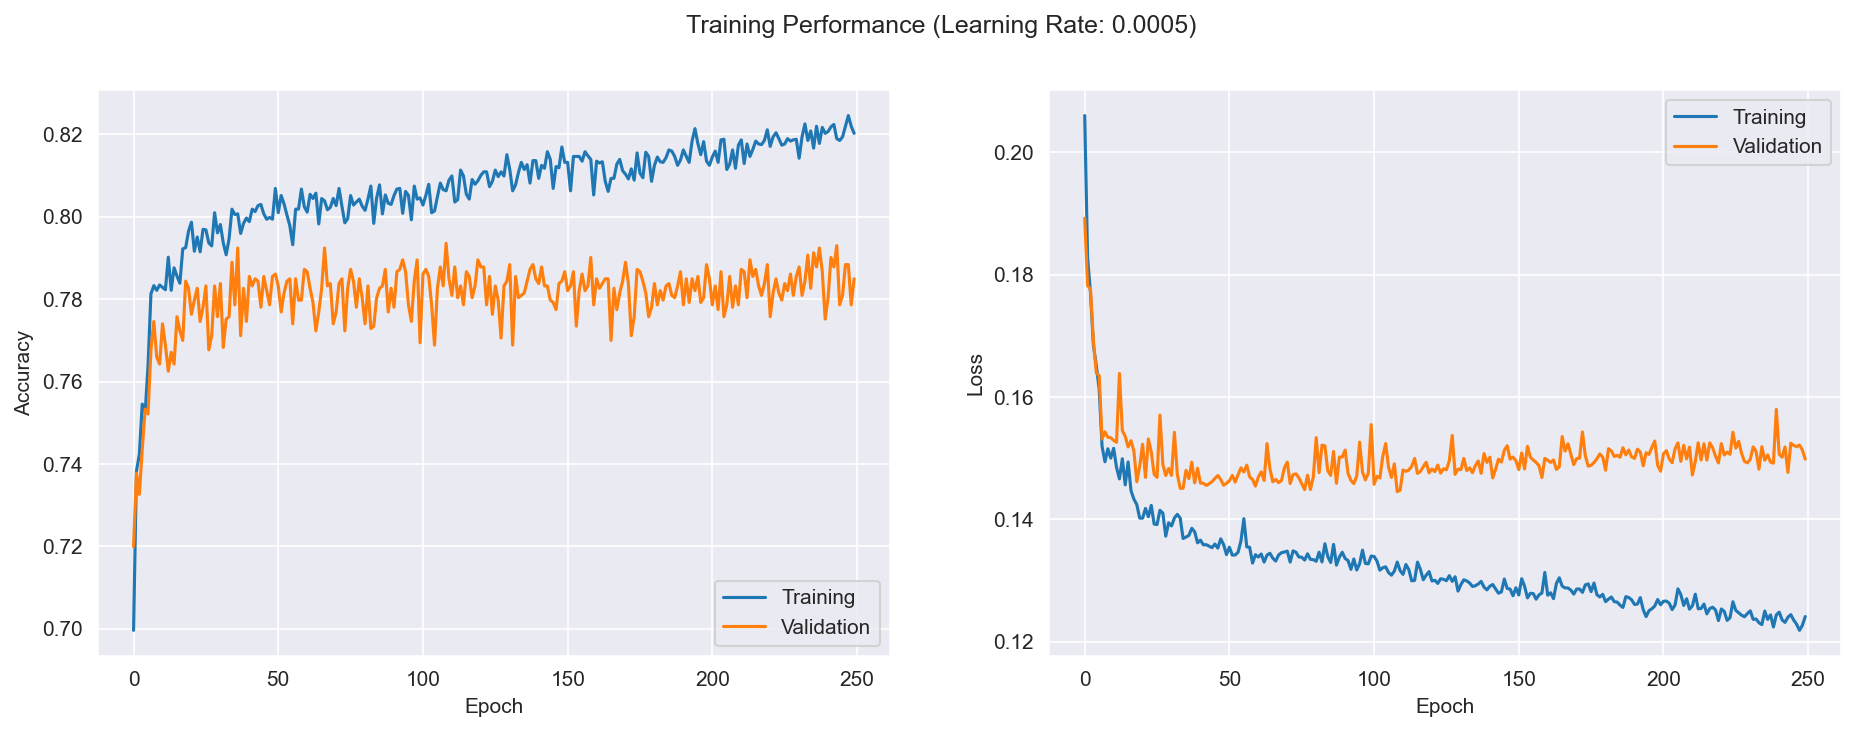

In [58]:
# Visualize training performance
performance = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5), dpi=150)
plt.suptitle(f'Training Performance (Learning Rate: {model.optimizer.learning_rate.numpy():.4f})')

plt.subplot(121)
plt.plot(performance['accuracy'], label='Training')
plt.plot(performance['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(122)
plt.plot(performance['loss'], label='Training')
plt.plot(performance['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=50,
    learning_rate=0.1,
    random_state=0
)

clf.fit(X_train, y_train.to_numpy().ravel())
clf.score(X_val, y_val)